In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import sys
import os
import pickle
import librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras
import random

In [71]:
df = pd.read_csv("features_3_sec.csv")
df.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              1972.744388           117335.771563  ...   39.687145   
1              2010.051501            65671.875673  ...   64.748276   
2              2084.565132            75124.921716  ...   67.336563   
3              1960.039988            82913.639269  ...   47.739452   
4              1948.503884            60204.020268  ...   30.336359   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -3.241280   36.488243     0.722209   38.099152    -5.050335   33.618073   
1    -6.055294   40.677654     0.159015   51.264091    -2.837699   97.030830   
2    -1.768610   28.348579     2.378768   45.717648    -1.938424   53.050835   
3    -3.841155   28.337118     1.218588   34.770935    -3.580352   50.836224   
4     0.664582   45.880913     1.689446   51.363583    -3.392489   26.738789   

   mfcc20_mean  mfcc20_var  label  
0    -0.243027   43.771767  blues  
1     5.784063   59.943081  blues  
2     2.517375   33.105122  blues  
3     3.630866   32.023678  blues  
4     0.536961   29.146694  blues  

[5 rows x 60 columns]

In [72]:
df.shape


(9990, 60)

In [73]:
df.dtypes

filename                    object
length                       int64
chroma_stft_mean           float64
chroma_stft_var            float64
rms_mean                   float64
rms_var                    float64
spectral_centroid_mean     float64
spectral_centroid_var      float64
spectral_bandwidth_mean    float64
spectral_bandwidth_var     float64
rolloff_mean               float64
rolloff_var                float64
zero_crossing_rate_mean    float64
zero_crossing_rate_var     float64
harmony_mean               float64
harmony_var                float64
perceptr_mean              float64
perceptr_var               float64
tempo                      float64
mfcc1_mean                 float64
mfcc1_var                  float64
mfcc2_mean                 float64
mfcc2_var                  float64
mfcc3_mean                 float64
mfcc3_var                  float64
mfcc4_mean                 float64
mfcc4_var                  float64
mfcc5_mean                 float64
mfcc5_var           

In [74]:
df = df.drop(labels="filename", axis=1)

In [75]:
print(df.head)

<bound method NDFrame.head of       length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0      66149          0.335406         0.091048  0.130405  0.003521   
1      66149          0.343065         0.086147  0.112699  0.001450   
2      66149          0.346815         0.092243  0.132003  0.004620   
3      66149          0.363639         0.086856  0.132565  0.002448   
4      66149          0.335579         0.088129  0.143289  0.001701   
...      ...               ...              ...       ...       ...   
9985   66149          0.349126         0.080515  0.050019  0.000097   
9986   66149          0.372564         0.082626  0.057897  0.000088   
9987   66149          0.347481         0.089019  0.052403  0.000701   
9988   66149          0.387527         0.084815  0.066430  0.000320   
9989   66149          0.369293         0.086759  0.050524  0.000067   

      spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0                1773.065032         

Demonstration of the Librosa Python library to visualize .wav files

In [76]:
record = "572947__jibey__rock-music.wav"
data, sr = librosa.load(record)
print(type(data), type(sr))

<class 'numpy.ndarray'> <class 'int'>


In [77]:
data, sr = librosa.load(record)

In [78]:
librosa.load(record, sr=45600)

(array([-7.81457121e-09,  1.66427094e-09,  1.14232435e-07, ...,
         3.03617911e-04,  4.84810531e-04,  4.20779950e-04], dtype=float32),
 45600)

In [79]:
import IPython
IPython.display.Audio(data, rate=sr)

Plotting Raw .wav files

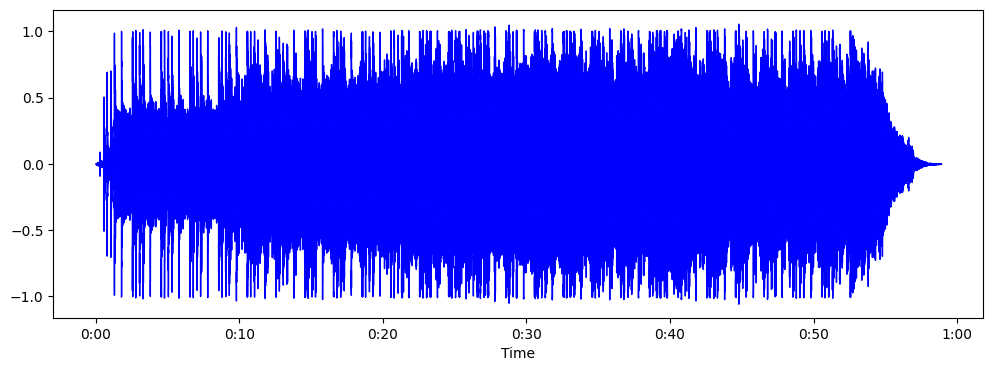

In [80]:
plt.figure(figsize=(12,4))
librosa.display.waveshow(data, color="blue")
plt.show()

Spectogram Plotting

/var/folders/fc/0_xr4lj14bg8l244mb3k3cvw0000gn/T/ipykernel_6558/3056019803.py:4: UserWarning: Trying to display complex-valued input. Showing magnitude instead.
  librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')


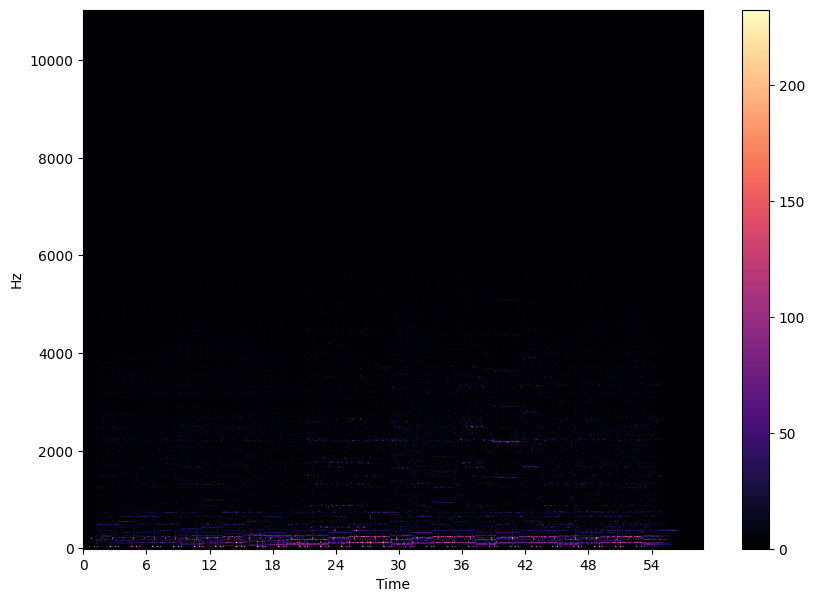

In [81]:
stft = librosa.stft(data)
stft_decibles = librosa.amplitude_to_db(abs(stft))
plt.figure(figsize=(10,7))
librosa.display.specshow(stft, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

In [82]:
classes = df.iloc[:, -1]
convertor = LabelEncoder()

In [83]:
y = convertor.fit_transform(classes)

In [84]:
y

array([0, 0, 0, ..., 9, 9, 9])

In [85]:
from sklearn.preprocessing import StandardScaler
fit = StandardScaler()
X=fit.fit_transform(np.array(df.iloc[:, :-1], dtype=float))
X

array([[ 0.        , -0.48780784,  0.64052047, ..., -0.51356204,
         0.12841417, -0.29178072],
       [ 0.        , -0.40314187,  0.13183473, ...,  1.01138445,
         1.27578001,  0.05642464],
       [ 0.        , -0.36169428,  0.7644909 , ..., -0.04624405,
         0.65390663, -0.52145798],
       ...,
       [ 0.        , -0.35433044,  0.42997426, ..., -0.15370124,
         0.11765485, -0.33882395],
       [ 0.        ,  0.0883611 , -0.00630133, ..., -0.72456977,
         0.30333409, -0.95893743],
       [ 0.        , -0.11321002,  0.19536324, ..., -0.37245283,
        -0.47495901, -0.55112155]])

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [87]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

7992 1998 7992 1998


In [88]:
from keras.models import Sequential

model_1 = Sequential([
    tf.keras.layers.Dense(1024, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(32, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_1.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


/Users/cylogan/sound_classification_project/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [89]:
model_1.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_63 (Dense)                │ (None, 1024)           │        60,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_65 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_43 (Dropout)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 760,106 (2.90 MB)

 Trainable params: 760,106 (2.90 MB)

 Non-trainable params: 0 (0.00 B)

In [90]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2024-06-06 16:52:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.1’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0.001s  

2024-06-06 16:52:10 (13.0 MB/s) - ‘helper_functions.py.1’ saved [10246/10246]



In [91]:
from helper_functions import create_tensorboard_callback, plot_loss_curves, compare_historys

In [92]:
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                       patience=3,
                                                       verbose=0,
                                                       restore_best_weights=True)
learning_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                         factor = 0.2,
                                                         min_lr=0.000001)
checkpoint_path = "./model_checkpoints/model_1.model.keras"
model_check_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,
                                                          monitor="val_loss",
                                                          save_best_only=True)

In [93]:
model_1_history = model_1.fit(X_train, y_train,
                              epochs = 50,
                              batch_size=32,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(dir_name="training_results",
                                                                     experiment_name="model_1"),
                                        early_stopping_callback,
                                        learning_callback,
                                        model_check_callback]
                              )

Saving TensorBoard log files to: training_results/model_1/20240606-165210
Epoch 1/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 11s 35ms/step - accuracy: 0.3797 - loss: 1.7466 - val_accuracy: 0.6927 - val_loss: 0.9379 - learning_rate: 0.0010
Epoch 2/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.6842 - loss: 0.9602 - val_accuracy: 0.7523 - val_loss: 0.7356 - learning_rate: 0.0010
Epoch 3/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.7432 - loss: 0.7677 - val_accuracy: 0.7853 - val_loss: 0.6357 - learning_rate: 0.0010
Epoch 4/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 25ms/step - accuracy: 0.8009 - loss: 0.6141 - val_accuracy: 0.8128 - val_loss: 0.5671 - learning_rate: 0.0010
Epoch 5/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 24ms/step - accuracy: 0.8287 - loss: 0.5177 - val_accuracy: 0.8358 - val_loss: 0.5069 - learning_rate: 0.0010
Epoch 6/50
250/250 ━━━━━━━━━━━━━━━━━━━━ 6s 26ms/step - accuracy: 0.8590 - loss: 0.4340 - val_accuracy: 0.8498 - val_loss: 0.4862 - learning_rate: 0.0010
Epoch 7

In [94]:
model_1.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8923 - loss: 0.3234


[0.3435908257961273, 0.8923923969268799]

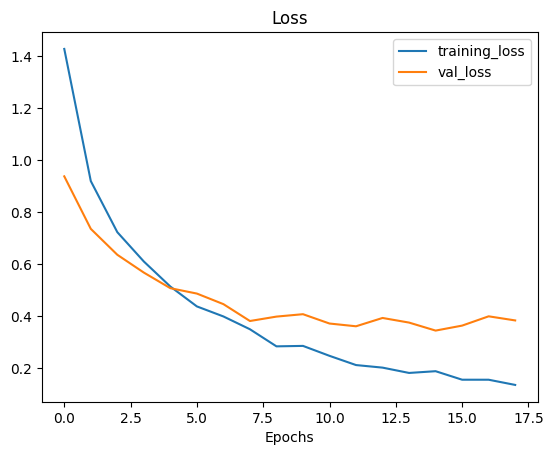

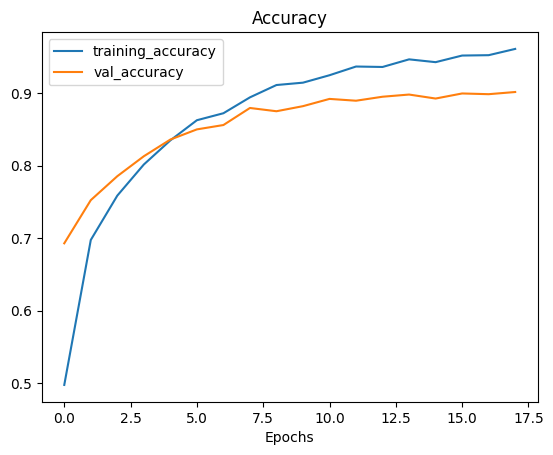

In [95]:
plot_loss_curves(model_1_history)

In [96]:
model_2 = Sequential([
    tf.keras.layers.Dense(1024, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

/Users/cylogan/sound_classification_project/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [97]:
model_2.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [98]:
m2_checkpoint_path = "./model_checkpoints/model_2.model.keras"
model_check_callback = tf.keras.callbacks.ModelCheckpoint(m2_checkpoint_path,
                                                          monitor="val_loss",
                                                          save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                       patience=3,
                                                       verbose=0,
                                                       restore_best_weights=True)
learning_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                         factor = 0.2,
                                                         min_lr=0.000001)

In [99]:
model_2_history = model_2.fit(X_train, y_train,
                              epochs = 600,
                              batch_size=64,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(dir_name="training_results",
                                                                     experiment_name="model_2"),
                                        early_stopping_callback,
                                        learning_callback,
                                        model_check_callback]
                              )

Saving TensorBoard log files to: training_results/model_2/20240606-165407
Epoch 1/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 8s 39ms/step - accuracy: 0.3975 - loss: 1.6733 - val_accuracy: 0.7242 - val_loss: 0.8380 - learning_rate: 0.0010
Epoch 2/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7082 - loss: 0.8678 - val_accuracy: 0.7763 - val_loss: 0.6651 - learning_rate: 0.0010
Epoch 3/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.7674 - loss: 0.6839 - val_accuracy: 0.7953 - val_loss: 0.5732 - learning_rate: 0.0010
Epoch 4/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8030 - loss: 0.5727 - val_accuracy: 0.8183 - val_loss: 0.5276 - learning_rate: 0.0010
Epoch 5/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8382 - loss: 0.4880 - val_accuracy: 0.8298 - val_loss: 0.5090 - learning_rate: 0.0010
Epoch 6/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8712 - loss: 0.3865 - val_accuracy: 0.8448 - val_loss: 0.4951 - learning_rate: 0.0010
Ep

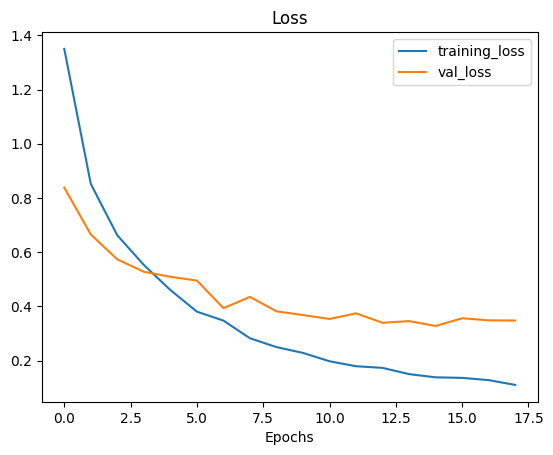

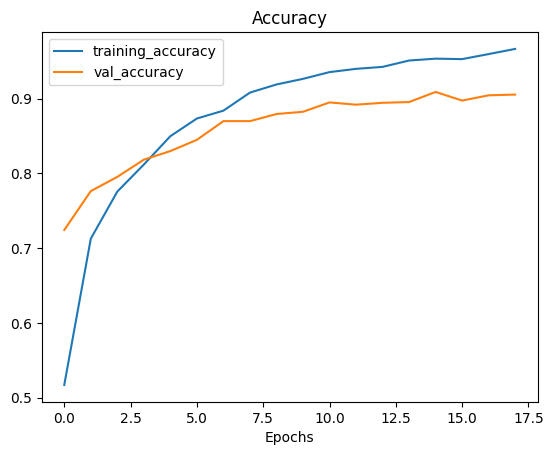

In [100]:
plot_loss_curves(model_2_history)

In [101]:
model_3 = Sequential([
    tf.keras.layers.Dense(1024, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_3.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

m3_checkpoint_path = "./model_checkpoints/model_3.model.keras"
model_check_callback = tf.keras.callbacks.ModelCheckpoint(m2_checkpoint_path,
                                                          monitor="val_loss",
                                                          save_best_only=True)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                       patience=5,
                                                       verbose=0,
                                                       restore_best_weights=True)
learning_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                         factor = 0.2,
                                                         min_lr=0.000001)

model_3_history = model_3.fit(X_train, y_train,
                              epochs = 600,
                              batch_size=64,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(dir_name="training_results",
                                                                     experiment_name="model_3"),
                                        early_stopping_callback,
                                        learning_callback,
                                        model_check_callback]
                              )


Saving TensorBoard log files to: training_results/model_3/20240606-165503
Epoch 1/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 7s 38ms/step - accuracy: 0.3820 - loss: 1.6808 - val_accuracy: 0.6987 - val_loss: 0.8882 - learning_rate: 0.0010
Epoch 2/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.6855 - loss: 0.9289 - val_accuracy: 0.7738 - val_loss: 0.6618 - learning_rate: 0.0010
Epoch 3/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.7742 - loss: 0.6700 - val_accuracy: 0.7953 - val_loss: 0.5860 - learning_rate: 0.0010
Epoch 4/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 24ms/step - accuracy: 0.8135 - loss: 0.5499 - val_accuracy: 0.8283 - val_loss: 0.5167 - learning_rate: 0.0010
Epoch 5/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.8423 - loss: 0.4495 - val_accuracy: 0.8504 - val_loss: 0.4358 - learning_rate: 0.0010
Epoch 6/600
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.8782 - loss: 0.3577 - val_accuracy: 0.8619 - val_loss: 0.4106 - learning_rate: 0.0010
Ep

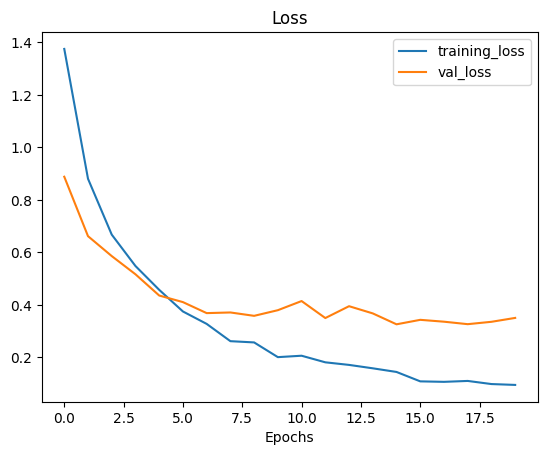

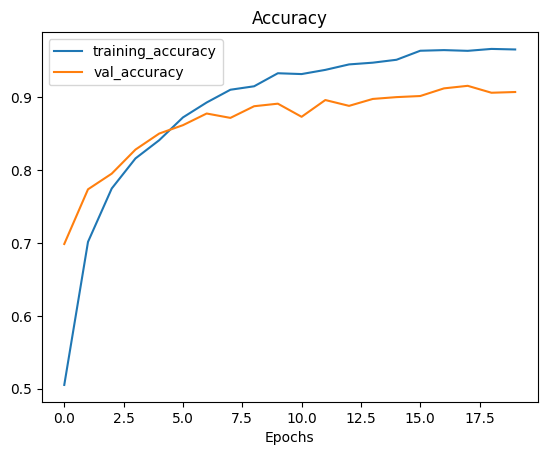

In [104]:
plot_loss_curves(model_3_history)

In [102]:
model_4 = Sequential([
    tf.keras.layers.Dense(1024, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_4.compile(loss="sparse_categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

m4_checkpoint_path = "./model_checkpoints/model_4.model.keras"
model_check_callback = tf.keras.callbacks.ModelCheckpoint(m4_checkpoint_path,
                                                          monitor="val_loss",
                                                          save_best_only=True)
#early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                      # patience=5,
                                                       #verbose=0,
                                                       #restore_best_weights=True)
learning_callback = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",
                                                         factor = 0.2,
                                                         min_lr=0.000001)

model_4_history = model_3.fit(X_train, y_train,
                              epochs = 35,
                              batch_size=64,
                              validation_data=(X_test, y_test),
                              callbacks=[create_tensorboard_callback(dir_name="training_results",
                                                                     experiment_name="model_4"),
                                        #early_stopping_callback,
                                        learning_callback,
                                        model_check_callback]
                              )


Saving TensorBoard log files to: training_results/model_4/20240606-165603
Epoch 1/35


/Users/cylogan/sound_classification_project/.venv/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9659 - loss: 0.1056 - val_accuracy: 0.9099 - val_loss: 0.3719 - learning_rate: 0.0010
Epoch 2/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9600 - loss: 0.1211 - val_accuracy: 0.8979 - val_loss: 0.3498 - learning_rate: 0.0010
Epoch 3/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9704 - loss: 0.0882 - val_accuracy: 0.9089 - val_loss: 0.3179 - learning_rate: 0.0010
Epoch 4/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9707 - loss: 0.0939 - val_accuracy: 0.9069 - val_loss: 0.3359 - learning_rate: 0.0010
Epoch 5/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9718 - loss: 0.0844 - val_accuracy: 0.9069 - val_loss: 0.3200 - learning_rate: 0.0010
Epoch 6/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.9621 - loss: 0.1187 - val_accuracy: 0.9104 - val_loss: 0.3409 - learning_rate: 0.0010
Epoch 7/35
125/125 ━━━━━━━━━━━━━━━━━━━━ 3s 23ms/step - accuracy: 0.9709 - loss: 0.0941 - val_

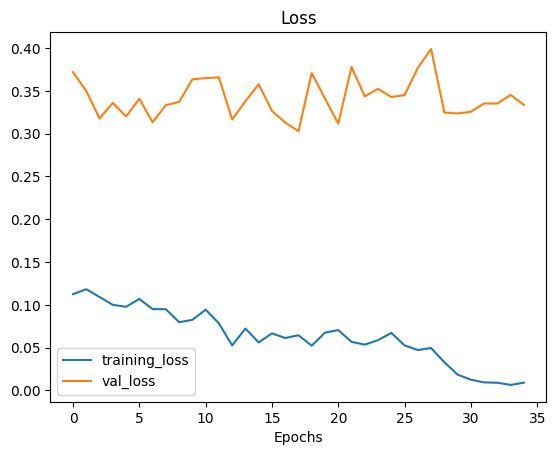

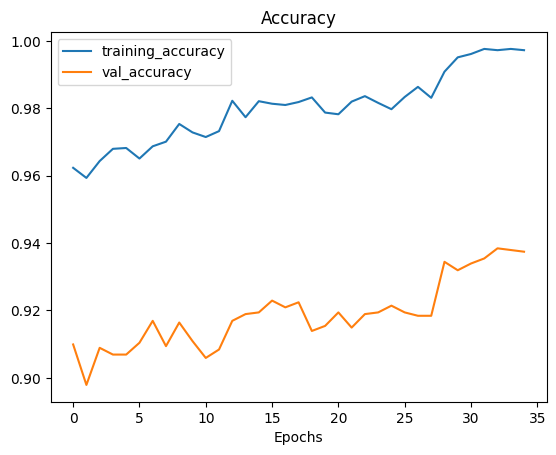

In [105]:
plot_loss_curves(model_4_history)

In [111]:
import tensorboard
%load_ext tensorboard
%tensorboard --logdir training_results

#Use ctrl/cmd shift P "Python: Run Tensorboard"

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [113]:
model_1.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8923 - loss: 0.3234


[0.3435908257961273, 0.8923923969268799]

In [114]:
model_2.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9023 - loss: 0.3597


[0.32745200395584106, 0.9089089035987854]

In [115]:
model_3.evaluate(X_test, y_test)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9335 - loss: 0.3726


[0.33361995220184326, 0.9374374151229858]

In [117]:
model_4.evaluate(X_test, y_test)

# Is that even possible lol

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.0896 - loss: 2.2957


[2.294734001159668, 0.10010010004043579]

In [121]:
# Try another way

def train_model(model, epochs, optimizer):
    batch_size = 128
    model.compile(optimizer = optimizer,
    loss = "sparse_categorical_crossentropy",
    metrics=["accuracy"])

    return model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size = batch_size, callbacks=[create_tensorboard_callback(dir_name="training_results", experiment_name="model_5")])

In [122]:
model_5 = Sequential([
    tf.keras.layers.Dense(512, activation="relu", input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation="softmax")
])

model_5_history = train_model(model=model_5, epochs=600, optimizer = "adam")

Saving TensorBoard log files to: training_results/model_5/20240606-172025
Epoch 1/600
63/63 ━━━━━━━━━━━━━━━━━━━━ 4s 46ms/step - accuracy: 0.3187 - loss: 1.8828 - val_accuracy: 0.6687 - val_loss: 1.0456
Epoch 2/600
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - accuracy: 0.5898 - loss: 1.1561 - val_accuracy: 0.7492 - val_loss: 0.7849
Epoch 3/600
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.6811 - loss: 0.9054 - val_accuracy: 0.7633 - val_loss: 0.7038
Epoch 4/600
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7389 - loss: 0.7651 - val_accuracy: 0.7873 - val_loss: 0.6065
Epoch 5/600
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.7744 - loss: 0.6643 - val_accuracy: 0.8038 - val_loss: 0.5563
Epoch 6/600
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8010 - loss: 0.6107 - val_accuracy: 0.8203 - val_loss: 0.5271
Epoch 7/600
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.8247 - loss: 0.5260 - val_accuracy: 0.8353 - val_loss: 0.4911
Epoch 8/600
63/63 ━━━━━━━━━━━━

In [123]:
val_loss, val_acc = model_5.evaluate(X_test, y_test)
print(f"The testing loss is {val_loss}\n")
print(f"The accuracy is {val_acc}")

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9355 - loss: 0.4115
The testing loss is 0.39728718996047974

The accuracy is 0.9389389157295227


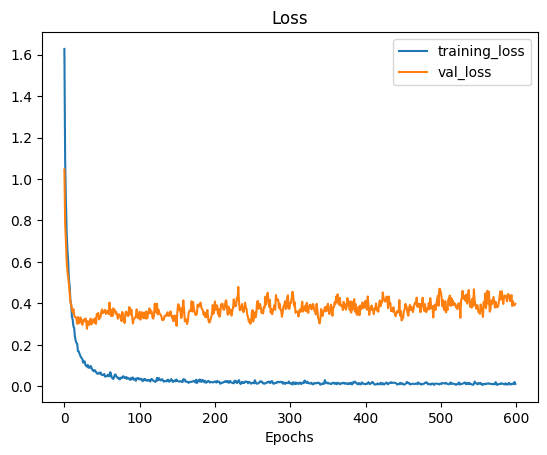

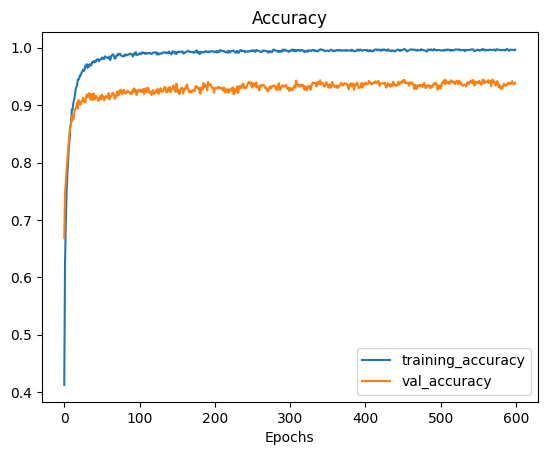

In [125]:
plot_loss_curves(model_5_history)

We can see that model 5 performed the best, however it was a ittle overkill on the epochs as the levelling out occurred much earlier. This model would likely benefit from transfer learning, and that is something I may look into in the future. Perhaps training the model on a image dataset with the mel-spectrograms would be beneficial to get the general patterns of the genre.